### Making Use of Vectorization

In [1]:
v = [1, 2, 3, 4, 5]

In [2]:
sm = [2 * i for i in v]

In [3]:
sm

[2, 4, 6, 8, 10]

In [4]:
2 * v

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

### Vectorization with NumPy

In [5]:
# Imports the NumPy package.
import numpy as np

In [6]:
# Instantiates an ndarray object based on the list object.
a = np.array(v)

In [7]:
# Prints out the data stored as ndarray object.
a

array([1, 2, 3, 4, 5])

In [8]:
# Looks up the type of the object.
type(a)

numpy.ndarray

In [9]:
# Achieves a scalar multiplication in vectorized fashion.
2 * a

array([ 2,  4,  6,  8, 10])

In [10]:
# Achieves a linear transformation in vectorized fashion.
0.5 * a + 2

array([2.5, 3. , 3.5, 4. , 4.5])

In [11]:
# Creates a one-dimensional ndarray object and reshapes it to two dimensions.
a = np.arange(12).reshape((4, 3))

In [12]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [13]:
2 * a

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [14]:
# Calculates the square of every element of the object in vectorized fashion.
a ** 2

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121]])

In [15]:
# Calculates the mean of all elements by a method call.
a.mean()

5.5

In [16]:
# Calculates the mean of all elements by a universal function.
np.mean(a)

5.5

In [17]:
# Calculates the mean along the first axis.
a.mean(axis=0)

array([4.5, 5.5, 6.5])

In [18]:
# Calculates the mean along the second axis.
np.mean(a, axis=1)

array([ 1.,  4.,  7., 10.])

### Vectorization with pandas

In [19]:
a = np.arange(15).reshape(5, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [20]:
# Imports the pandas package.
import pandas as pd

In [21]:
# Creates a list object out of the str object.
columns = list('abc')
columns

['a', 'b', 'c']

In [22]:
# A pandas DatetimeIndex object is created that has a "business day" frequency
# and goes over five periods.
index = pd.date_range('2022-2-1', periods=5, freq='B')
index

DatetimeIndex(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-07'],
              dtype='datetime64[ns]', freq='B')

In [23]:
# A DataFrame object is instantiated based on the ndarray object a with column
# labels and index values specified.
df = pd.DataFrame(a, columns=columns, index=index)
df

,a,b,c
2022-02-01,0,1,2
2022-02-02,3,4,5
2022-02-03,6,7,8
2022-02-04,9,10,11
2022-02-07,12,13,14


In [24]:
# Calculates the scalar product for the DataFrame object (treated as a matrix).
2 * df

,a,b,c
2022-02-01,0,2,4
2022-02-02,6,8,10
2022-02-03,12,14,16
2022-02-04,18,20,22
2022-02-07,24,26,28


In [25]:
# Calculates the sum per column.
df.sum()

a    30
b    35
c    40
dtype: int64

In [26]:
# Calculates the mean per column.
np.mean(df, axis=0)

a    6.0
b    7.0
c    8.0
dtype: float64

In [27]:
# Calculates the element-wise sum over columns a and c.
df['a'] + df['c']

2022-02-01     2
2022-02-02     8
2022-02-03    14
2022-02-04    20
2022-02-07    26
Freq: B, dtype: int64

In [28]:
# Calculates a linear transform involving all three columns.
0.5 * df.a + 2 * df.b - df.c

2022-02-01     0.0
2022-02-02     4.5
2022-02-03     9.0
2022-02-04    13.5
2022-02-07    18.0
Freq: B, dtype: float64

In [29]:
# Which element in column a is greater than five?
df['a'] > 5

2022-02-01    False
2022-02-02    False
2022-02-03     True
2022-02-04     True
2022-02-07     True
Freq: B, Name: a, dtype: bool

In [30]:
# Select all those rows where the element in column a is greater than five.
df[df['a'] > 5]

,a,b,c
2022-02-03,6,7,8
2022-02-04,9,10,11
2022-02-07,12,13,14


In [31]:
# For which date is the element in column c greater than in column b?
df['c'] > df['b']

2022-02-01    True
2022-02-02    True
2022-02-03    True
2022-02-04    True
2022-02-07    True
Freq: B, dtype: bool

In [32]:
# Condition comparing a linear combination of columns a and b with column c.
0.15 * df.a + df.b > df.c

2022-02-01    False
2022-02-02    False
2022-02-03    False
2022-02-04     True
2022-02-07     True
Freq: B, dtype: bool

### Strategies Based on Simple Moving Averages

### Getting into the Basics

In [33]:
# Reads the data from the remotely stored CSV file.
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()
# Shows the meta information for the DataFrame object.
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [34]:
# Transforms the Series object to a DataFrame object.
data = pd.DataFrame(raw['EUR='])

In [35]:
# Renames the only column to price.
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [36]:
# Shows the meta information for the new DataFrame object.
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [37]:
# Creates a column with 42 days of SMA values. The first 41 values will be NaN.
data['SMA1'] = data['price'].rolling(42).mean()
# Creates a column with 252 days of SMA values. The first 251 values will be NaN.
data['SMA2'] = data['price'].rolling(252).mean()

In [38]:
# Prints the final five rows of the data set.
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [39]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

<AxesSubplot:title={'center':'EUR/USD | 42 & 252 days SMAs'}, xlabel='Date'>

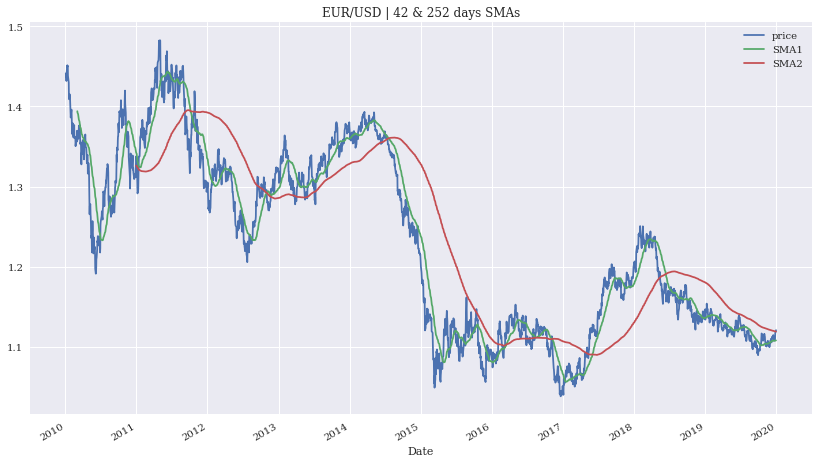

In [40]:
data.plot(title='EUR/USD | 42 & 252 days SMAs', figsize=(14, 8))

In [41]:
# Implements the trading rule in vectorized fashion. np.where() produces +1 for
# rows where the expression is True and -1 for rows where the expression is False.
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [42]:
# Deletes all rows of the data set that contain at least one NaN value.
data.dropna(inplace=True)

<AxesSubplot:title={'center':'Market Positioning'}, xlabel='Date'>

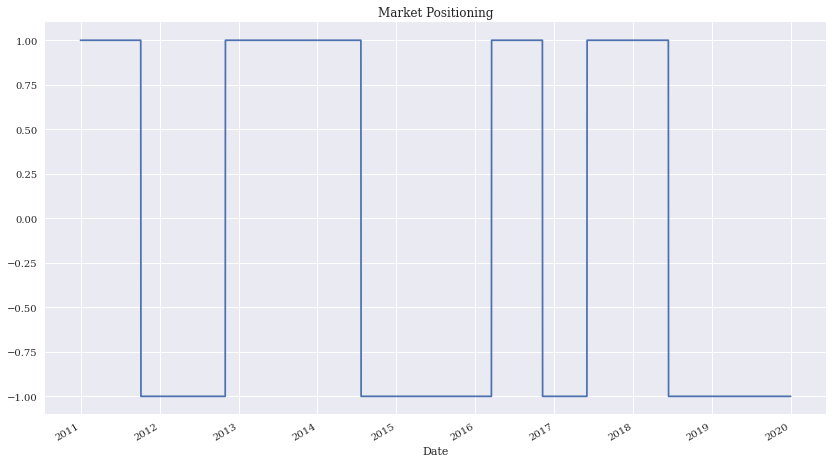

In [43]:
# Plots the positioning over time.
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(14, 8))

In [44]:
# Calculates the log returns in vectorized fashion over the price column.
data['returns'] = np.log(data['price'] / data['price'].shift(1))

<AxesSubplot:>

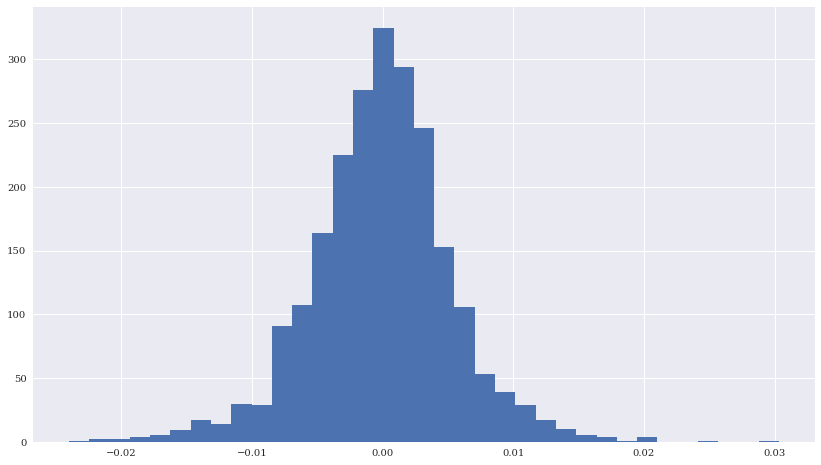

In [45]:
# Plots the log returns as a histogram (frequency distribution).
data['returns'].hist(bins=35, figsize=(14, 8))

In [46]:
# Derives the log returns of the strategy given the positionings and market returns.
data['strategy'] = data['position'].shift(1) * data['returns']

In [47]:
# Sums up the single log return values for both the stock and the strategy (for illus‐
# tration only).
data[['returns', 'strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [48]:
# Applies the exponential function to the sum of the log returns to calculate the
# gross performance.
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

<AxesSubplot:xlabel='Date'>

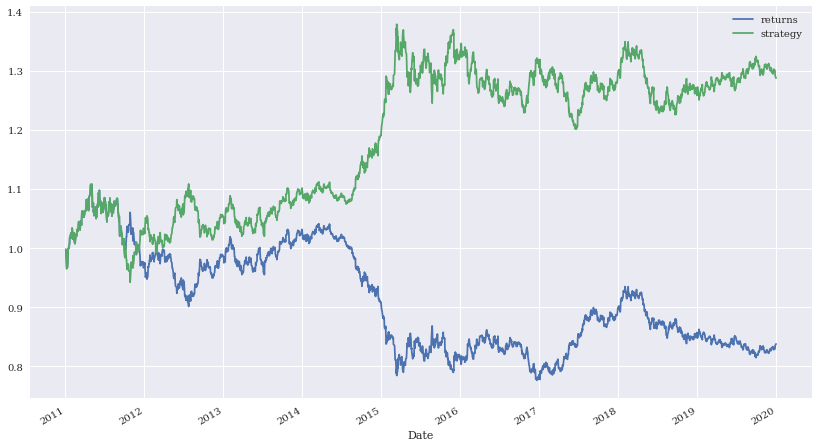

In [49]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(14, 8))

In [50]:
# Calculates the annualized mean return in both log and regular space.
data[['returns', 'strategy']].mean() * 252

returns    -0.019671
strategy    0.028174
dtype: float64

In [51]:
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns    -0.019479
strategy    0.028575
dtype: float64

In [52]:
# Calculates the annualized standard deviation in both log and regular space.
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.085414
strategy    0.085405
dtype: float64

In [53]:
(data[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5

returns     0.085405
strategy    0.085373
dtype: float64

In [54]:
# Defines a new column, cumret, with the gross performance over time.
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [55]:
# Defines yet another column with the running maximum value of the gross
# performance.
data['cummax'] = data['cumret'].cummax()

<AxesSubplot:xlabel='Date'>

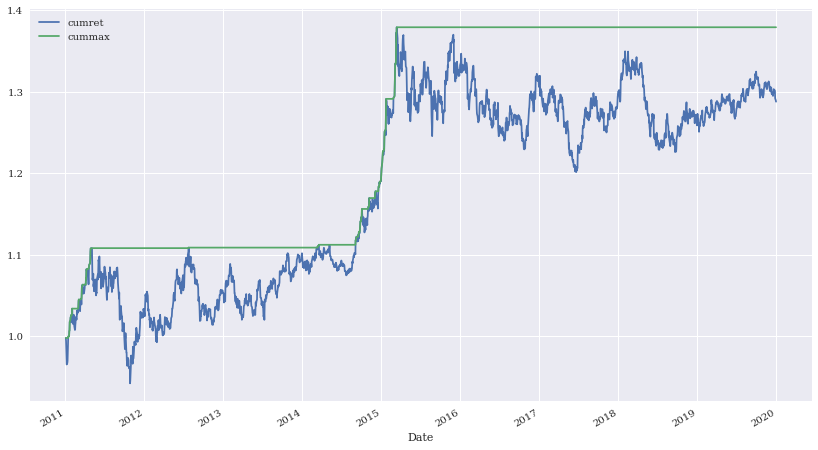

In [56]:
# Plots the two new columns of the DataFrame object.
data[['cumret', 'cummax']].dropna().plot(figsize=(14, 8))

In [57]:
# Calculates the element-wise difference between the two columns.
drawdown = data['cummax'] - data['cumret']

In [58]:
# Picks out the maximum value from all differences.
drawdown.max()

0.17779367070195895

In [59]:
# Where are the differences equal to zero?
temp = drawdown[drawdown == 0]

In [60]:
# Calculates the timedelta values between all index values.
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())

In [61]:
periods[12:15]

array([datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=10)], dtype=object)

In [62]:
# Picks out the maximum timedelta value.
periods.max()

datetime.timedelta(days=596)

### Generalizing the Approach

In [63]:
# This imports the module as SMA.
from scripts.sma_vector_backtester import SMAVectorBacktester

In [64]:
# Backtests the SMA-based strategy, given the parameters during instantiation.
smabt = SMAVectorBacktester('EUR=', 42, 252, '2010-1-1', '2019-12-31')

In [65]:
# Backtests the SMA-based strategy, given the parameters during instantiation.
smabt.run_strategy()

(1.29, 0.45)

In [66]:
%%time
# The optimize_parameters() method takes as input parameter ranges with step
# sizes and determines the optimal combination by a brute force approach.
smabt.optimize_parameters((30, 50, 2), (200, 300, 2))

CPU times: user 5.03 s, sys: 0 ns, total: 5.03 s
Wall time: 5.01 s


(array([ 48., 238.]), 1.5)

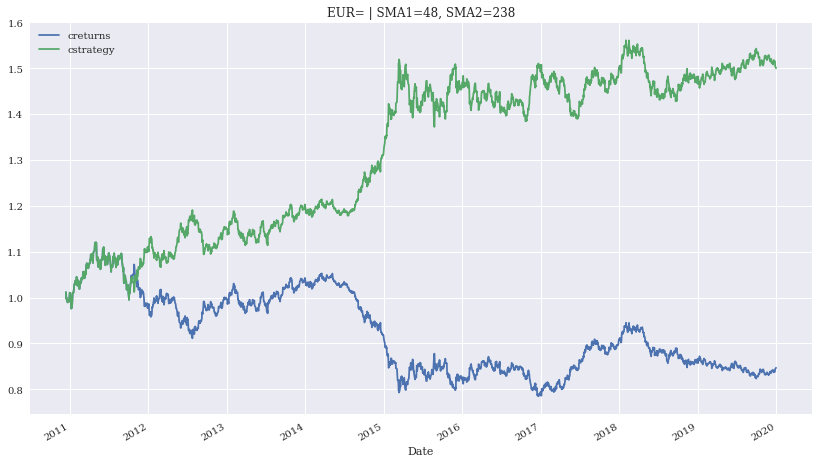

In [67]:
# The plot_results() method plots the strategy performance compared to the
# benchmark instrument, given the currently stored parameter values (here from
# the optimization procedure).
smabt.plot_results()